In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
credit_card_data = pd.read_csv('/content/fraudTrain.csv')

In [5]:
import pandas as pd
credit_card_data = pd.read_csv('/content/fraudTest.csv', on_bad_lines='skip')
print(credit_card_data.shape)

(62233, 23)


In [6]:
credit_card_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [7]:
credit_card_data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [8]:
def segment_by_amount(row):
  if row['amt'] > 100:
    return 'High Value'
  elif row['amt'] > 10:
    return 'medium Value'
  else:
    return 'low Value'

credit_card_data['Amount_segment'] = credit_card_data.apply(segment_by_amount, axis=1)
print(credit_card_data.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      long  city_pop  \
0   Elliott      M            351 Darlene Green  ...  -80.9355  333497.0   
1  Williams      F             3638 Marsh Union  ... -110.43

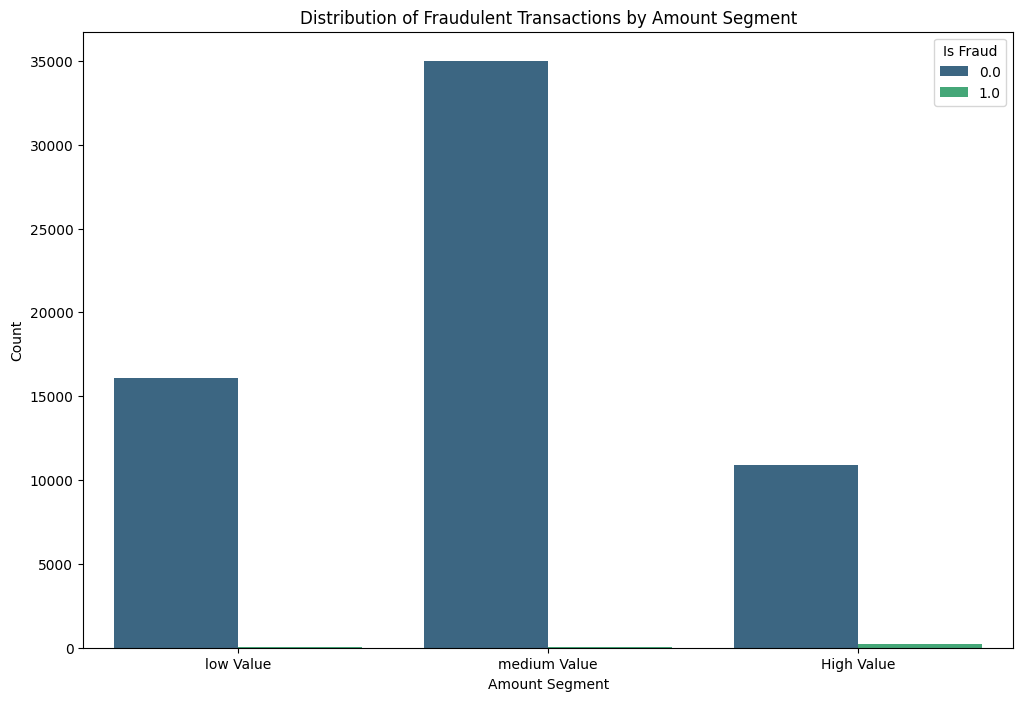

In [10]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Amount_segment', hue='is_fraud', data=credit_card_data, palette='viridis')
plt.title('Distribution of Fraudulent Transactions by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.legend(title='Is Fraud', loc='upper right')
plt.show()

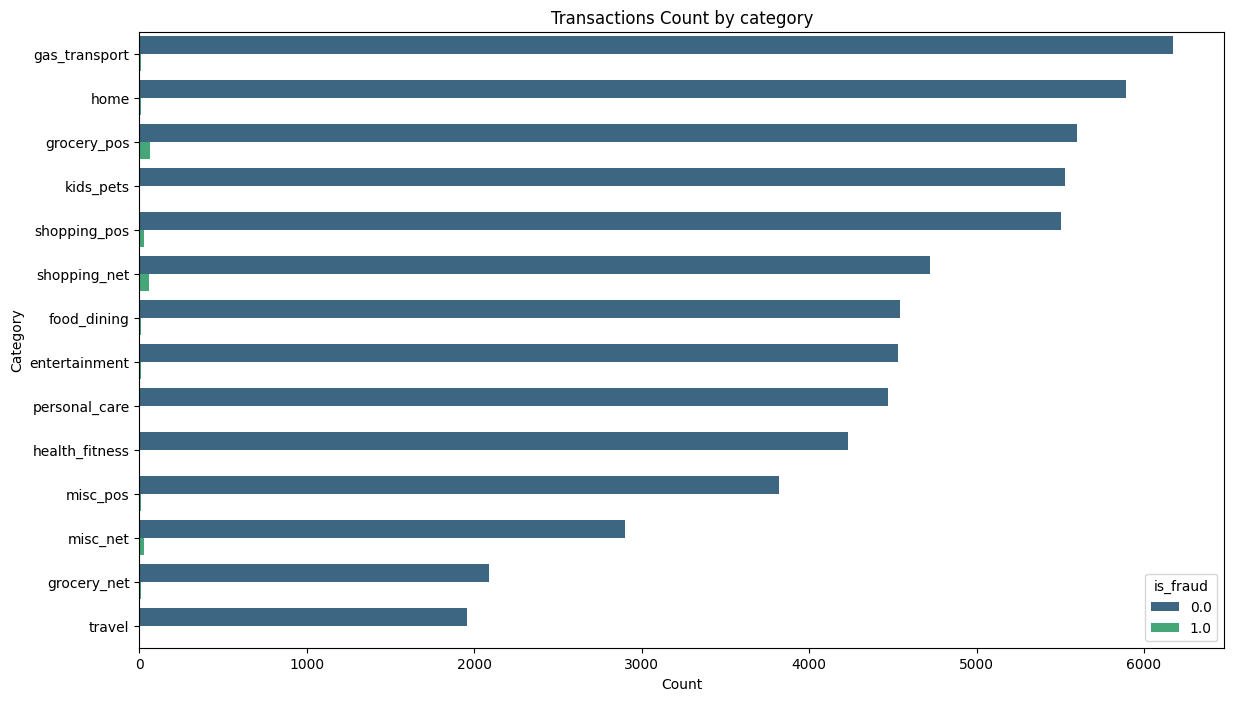

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(y='category', hue='is_fraud', data=credit_card_data,
              palette='viridis', order=credit_card_data['category'].value_counts().index)
plt.title('Transactions Count by category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'Amount_segment'],
      dtype='object')


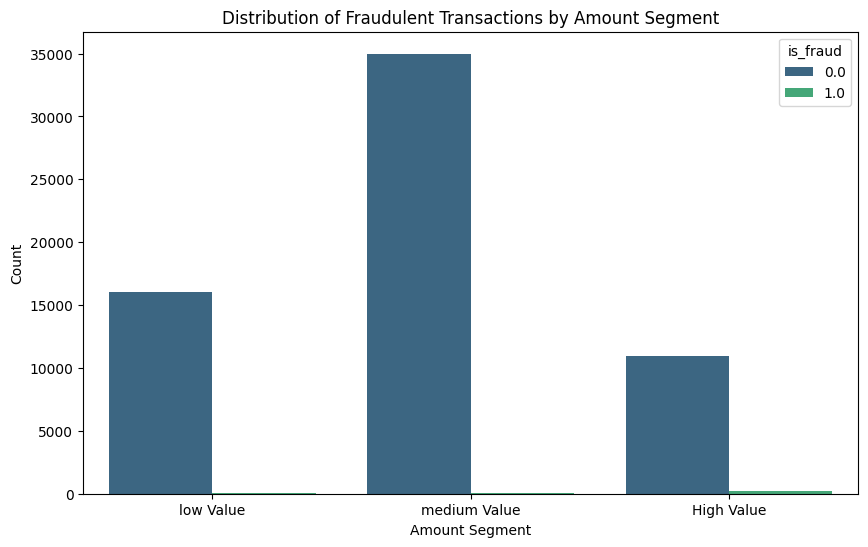

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print(credit_card_data.columns)

plt.figure(figsize=(10, 6))
sns.countplot(x='Amount_segment', hue='is_fraud', data=credit_card_data, palette='viridis')
plt.title('Distribution of Fraudulent Transactions by Amount Segment')
plt.xlabel('Amount Segment')
plt.ylabel('Count')
plt.show()

In [12]:
from operator import le
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
credit_card_data = pd.read_csv('/content/fraudTrain.csv')

df = credit_card_data.head(2000)

print(df.head())
print(df.info())
print(df.describe())
print(df.columns)

for column in df.columns:
  if df[column].dtype in ['int64', 'float64']:
    df[column].fillna(df[column].mean(), inplace=True)
  else:
    df[column].fillna(df[column].mode()[0], inplace=True)

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  df[column] = le.fit_transform(df[column])
  label_encoders[column] = le


df = df.drop(columns=['Unnamed: 0', 'trans_date_trans_time', 'first', 'last', 'street', 'city', 'state'])

X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

<ipython-input-12-682d983ed4ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mean(), inplace=True)
<ipython-input-12-682d983ed4ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)
<ipython-input-12-682d983ed4ee>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(d

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import numpy as np
import pandas as pd

# Check the unique values and their counts in y_train
print("Unique values in y_train:", y_train.unique())
print("Class distribution in y_train:\n", y_train.value_counts())

# Simulate additional data points for the missing class
missing_class_size = 200
X_additional = np.random.rand(missing_class_size, X_train_scaled.shape[1])
y_additional = np.ones(missing_class_size)

# Combine the additional data with the original training data
X_train_augmented = np.vstack([X_train_scaled, X_additional])
y_train_augmented = np.concatenate([y_train, y_additional])

# Check the new class distribution
print("New class distribution in y_train_augmented:\n", pd.Series(y_train_augmented).value_counts())

# Apply RandomOverSampler to balance the classes if necessary
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_augmented, y_train_augmented)

# Check the balanced class distribution
print("Balanced class distribution in y_train_balanced:\n", pd.Series(y_train_balanced).value_counts())

# Initialize models with class weight adjustments
log_reg = LogisticRegression(class_weight='balanced')
rf_clf = RandomForestClassifier(class_weight='balanced')
gb_clf = GradientBoostingClassifier()

# Fit the models
log_reg.fit(X_train_balanced, y_train_balanced)
rf_clf.fit(X_train_balanced, y_train_balanced)
gb_clf.fit(X_train_balanced, y_train_balanced)

models = [log_reg, rf_clf, gb_clf]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']

# Cross-validation scores
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')
    print(f"{name} ROC AUC Score: {scores.mean():.2f} ± {scores.std():.2f}")

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    return accuracy, precision, recall, f1, roc_auc, cm

# Evaluate the models on test set
for model, name in zip(models, model_names):
    accuracy, precision, recall, f1, roc_auc, cm = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(f"{name} Precision: {precision:.2f}")
    print(f"{name} Recall: {recall:.2f}")
    print(f"{name} F1 Score: {f1:.2f}")
    print(f"{name} ROC AUC: {roc_auc:.2f}")
    print(f"{name} Confusion Matrix:\n{cm}")
    print("------")


Unique values in y_train: [0. 1.]
Class distribution in y_train:
 is_fraud
0.0    1583
1.0      17
Name: count, dtype: int64
New class distribution in y_train_augmented:
 0.0    1583
1.0     217
Name: count, dtype: int64
Balanced class distribution in y_train_balanced:
 0.0    1583
1.0    1583
Name: count, dtype: int64
Logistic Regression ROC AUC Score: 0.97 ± 0.01
Random Forest ROC AUC Score: 1.00 ± 0.00
Gradient Boosting ROC AUC Score: 1.00 ± 0.00
Logistic Regression Accuracy: 0.94
Logistic Regression Precision: 0.13
Logistic Regression Recall: 1.00
Logistic Regression F1 Score: 0.24
Logistic Regression ROC AUC: 0.98
Logistic Regression Confusion Matrix:
[[370  26]
 [  0   4]]
------
Random Forest Accuracy: 0.99
Random Forest Precision: 1.00
Random Forest Recall: 0.00
Random Forest F1 Score: 0.00
Random Forest ROC AUC: 0.96
Random Forest Confusion Matrix:
[[396   0]
 [  4   0]]
------
Gradient Boosting Accuracy: 0.99
Gradient Boosting Precision: 0.67
Gradient Boosting Recall: 0.50
Gr

In [44]:
from sklearn.model_selection import GridSearchCV

paras_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split':[2, 5, 10]
}

grid_rf = GridSearchCV(rf_clf, paras_grid_rf, cv=5, scoring='roc_auc')
grid_rf.fit(X_train, y_train)
print(f"Best parameters for Random Foresr: {grid_rf.best_params_}")

paras_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7]
}

grib_gb = GridSearchCV(gb_clf, paras_grid_gb, cv=5, scoring='roc_auc')
grib_gb.fit(X_train, y_train)
print(f"Best parameters for Gradient Boosting: {grib_gb.best_params_}")



Best parameters for Random Foresr: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [50]:
from sklearn.model_selection import GridSearchCV

paras_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split':[2, 5, 10]
}

best_rf = grid_rf.best_estimator_
best_gb = grib_gb.best_estimator_


for model, name in zip([log_reg, best_rf, best_gb], ['Logistic Regression', 'Tuned Random Forest', 'Tuned Gradient Boosting']):
    accuracy, precision, recall, f1, roc_auc, _ = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}")

Logistic Regression - Accuracy: 0.94, Precision: 0.13, Recall: 1.00, F1 Score: 0.24, ROC AUC: 0.98
Tuned Random Forest - Accuracy: 0.99, Precision: 1.00, Recall: 0.00, F1 Score: 0.00, ROC AUC: 0.50
Tuned Gradient Boosting - Accuracy: 0.99, Precision: 1.00, Recall: 0.00, F1 Score: 0.00, ROC AUC: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


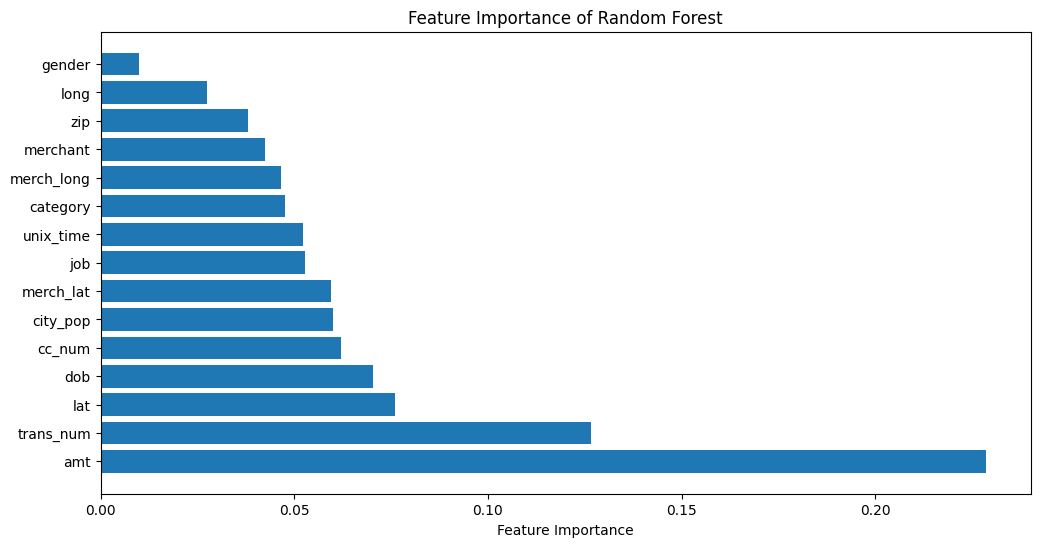

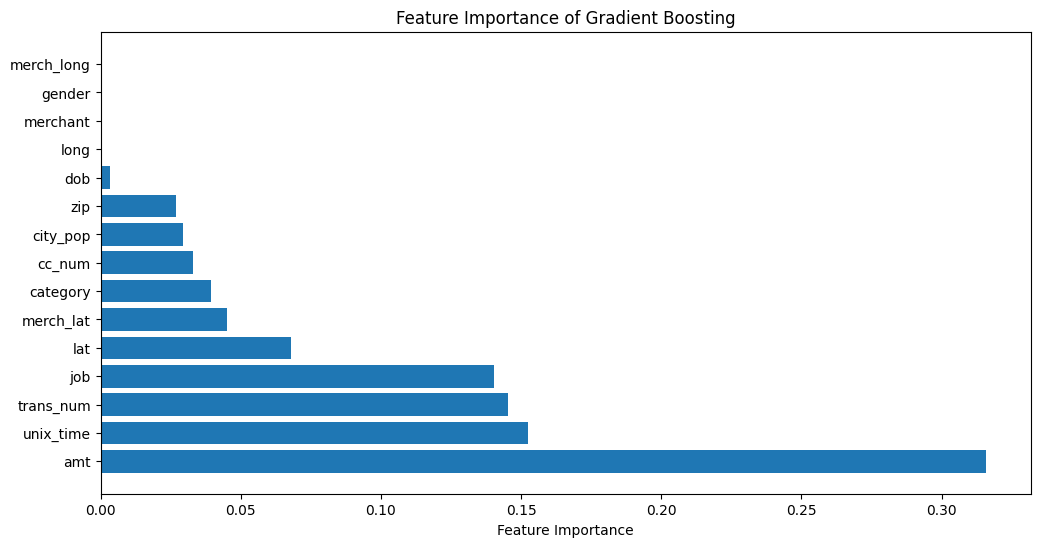

In [54]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance_rf = best_rf.feature_importances_
sorted_idx_rf = np.argsort(feature_importance_rf)[::-1]
plt.figure(figsize=(12, 6))

plt.barh(range(len(sorted_idx_rf)), feature_importance_rf[sorted_idx_rf])
plt.yticks(range(len(sorted_idx_rf)), X.columns[sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Random Forest')
plt.show()


feature_importance_gb = best_gb.feature_importances_
sorted_idx_gb = np.argsort(feature_importance_gb)[::-1]
plt.figure(figsize=(12, 6))

plt.barh(range(len(sorted_idx_gb)), feature_importance_gb[sorted_idx_gb])
plt.yticks(range(len(sorted_idx_gb)), X.columns[sorted_idx_gb])
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Gradient Boosting')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


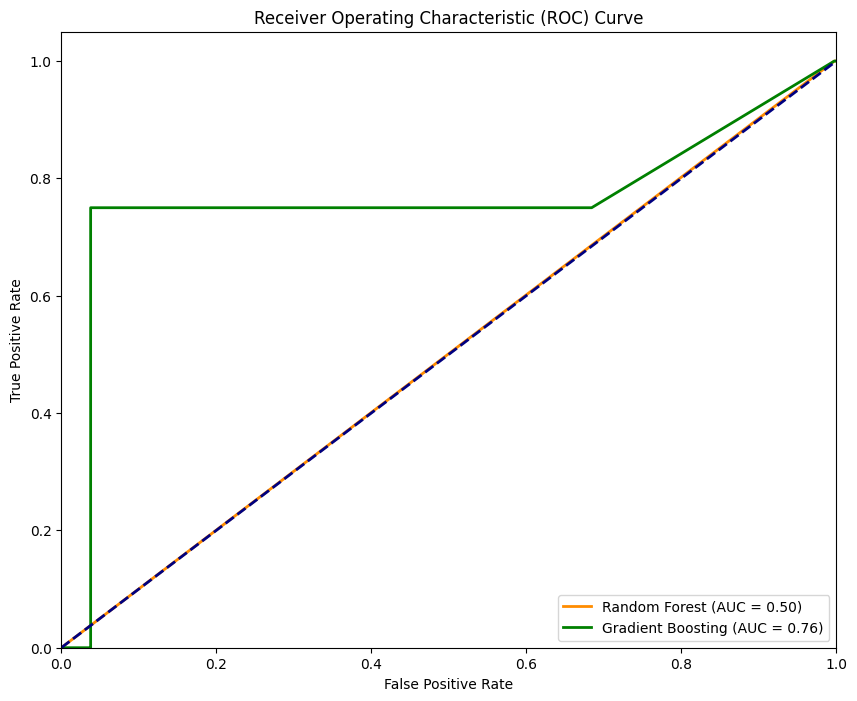

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# ROC Curve for Gradient Boosting
y_pred_proba_gb = best_gb.predict_proba(X_test_scaled)[:, 1]
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_pred_proba_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gb, tpr_gb, color='green', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()